<b style="color:red">Run the cell below before you get started!</b>

In [ ]:
from fds import *

<h1>Fossil fuels and global temperatures</h1>

For this assignment we will be using data collected by the National Oceanic and Atmospheric Administration (NOAA) and by Carbon Dioxide Information Analysis Center (CDIAC), both US governmental science organizations.

The NOAA data consists of <b>yearly global average temperatures</b>, more specifically, the total land-and-sea global average which combines temperature measurements from both land and sea. The average was around 13 °C in the last century although most datasets subtract this average to work with the deviation instead. This temperature is one of the main indicators for the warming of our planet in very recent history.

The CDIAC dataset (available <a href="https://datahub.io/core/co2-fossil-by-nation#readme">here</a>) lists <b>CO2-emissions from fossil fuels</b>, measured in thousand metric tons of carbon. The original dataset refines this data by nation and by type of fuel (solid, liquid, gas, etc.) but here we will only work with yearly totals.

<div class="task">
    <div class="no">1</div>
    <div class="text">
        The following code cell is supposed to read the dataset contained
    in <code>01-resources/temp-vs-fossil.csv</code> and put the each column
    ("Year", "Temp", "Emissions") into the corresponding lists 
        (<code>years</code>,<code>temps</code>,<code>emissions</code>).
    Complete the code so that it fulfills this task, the subsequent cell
    contains a test that <b>must</b> be passed!
    </div>
</div>

In [1]:
years = []
temps = []
emissions = []

with open('01-resources/temp-vs-fossil.csv', 'r') as f:
    it = iter(f)
    next(it)
    for l in it:
        print(l, type(l[0]), type(l[1]), type(l[2]))
        line = l.split(',')
        years.append(int(line[0]))
        temps.append(float(line[1]))
        emissions.append(int(line[2]))
pass

FileNotFoundError: ignored

In [ ]:
print(len(years) == len(temps) == len(emissions))
print(min(years), max(years))
print(min(temps), max(temps))
print(min(emissions), max(emissions))

True
1880 2014
13.450000000000001 14.64
233049 9306200


In [ ]:
### Do not change the code in this cell ###
try:
    assert len(emissions) == len(years) and len(years) == len(temps), "Lists have wrong length"
    check_passed("List lengths okay")
    assert all(isinstance(y, int) for y in years), "`years` data should be integers"
    assert sum(years) == 262845, "`years` data is incorrect"
    check_passed("`years` okay")
    assert all(isinstance(t, float) for t in temps), "`temps` data should be floats"
    assert int(sum(temps)) == 1881, "`temps` data is incorrect"
    check_passed("`temps` okay")
    assert all(isinstance(e, int) for e in emissions), "`emissions` data should be integers"    
    assert sum(emissions) == 386100147, "`emissions` data is incorrect"
    check_passed("`emissions` okay")
    test = [int(sum(e))*(i**2) % 1000 for i,e in enumerate(zip(years,temps,emissions))]
    assert sum(test[::2])-sum(test[1::2]) == -3848, "Lists are in wrong order"
    check_passed("Order okay")
    test_passed('All tests passed!')
except AssertionError as msg:
    error("Test failed", msg)
    pass

✓ List lengths okay
✓ `years` okay
✓ `temps` okay
✓ `emissions` okay
✓ Order okay


<div class="task">
    <div class="no">2</div>
    <div class="text">
        Describe, in about 150 words, the dataset we just loaded. Include the code you use to 
        look at the data.
    </div>
</div>

<div class="hint">Hint: Think about the data types we discussed, about whether the data is complete, what the range of the individual columns is.</div>

The data are read one line at a time by the for loop from the iter object. Each line is comprised by a string containing comma separated numbers. To visualize the data I have used <code>print(l, type(l[0]), type(l[1]), type(l[2]))</code>
which printed a line for every iteration of the for loop and the data type of each comma separated field. I then used <code>line = l.split(',')</code> to divide each string into the three fields separated by the comma. I then appended the first field to the 'years' list, the second to the 'temps' and the third to "emissions". Since the data are in string format a type-casting was necessary before appending, this was accomplished by the following code:
<code>years.append(int(line[0]))
temps.append(float(line[1]))
emissions.append(int(line[2]))</code>

I have converted years to integer, temps to float because its strings appeared to be separated by a dot, and emissions to int.
No data entry seems to be missing since the lengths of the three lists are equal; the following code returns 'True':
    
<code>print(len(years) == len(temps) == len(emissions))</code>

No data seeems to be missing, the following code:

<code>print(min(years), max(years))
print(min(temps), max(temps))
print(min(emissions), max(emissions))</code>

shows that no entries are set to zero. We may assume that the data are complete and no further processsing is needed.

<div class="task">
    <div class="no">3</div>
    <div class="text"> 
        Complete the code in the next cell to plot the yearly temperatures (x-axis: time, y-axis: temperature).
        Make sure the axes of the plots are labelled correctly. 
    </div>
</div>


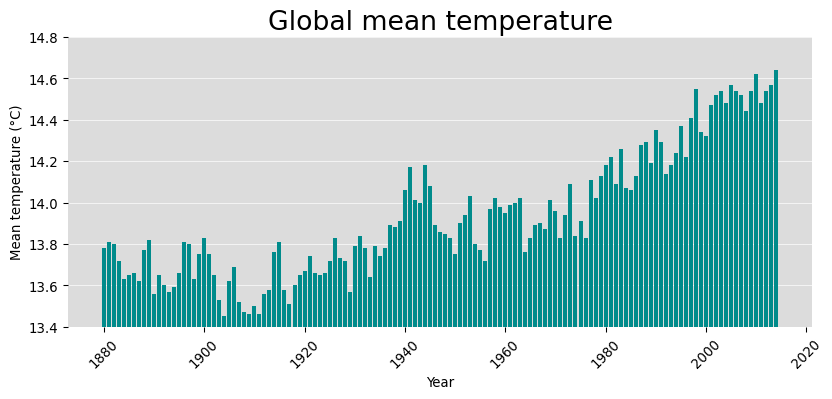

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4), dpi=96)
ax.bar(years, temps, color='darkcyan', zorder=2)
ax.grid(axis='y',color='w', lw=0.5 )
ax.set(facecolor = "gainsboro")
plt.ylim(13.4, 14.8)
ax.set_title('Global mean temperature', size=20)
ax.set_ylabel('Mean temperature (°C)')
ax.set_xlabel("Year")
plt.xticks(rotation = 45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

<div class="task">
    <div class="no">4</div>
    <div class="text">Complete the code in the next cell to plot the yearly CO2 emission (x-axis: time, y-axis: emissions).
        Make sure the axes of the plots are labelled correctly.</div>
</div>


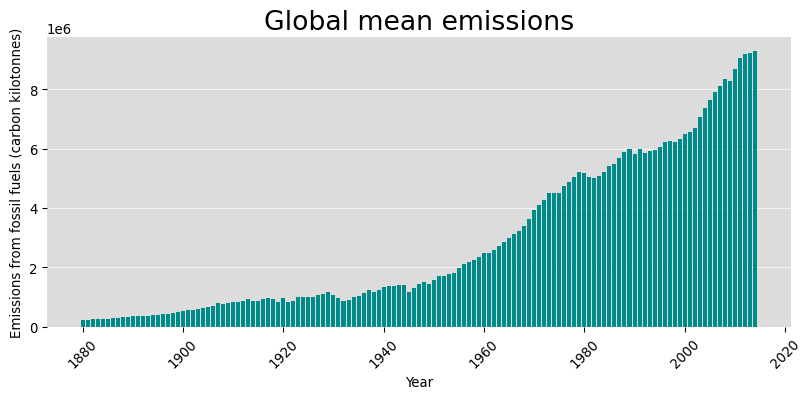

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4), dpi=96)
plt.bar(years, emissions,  color='darkcyan', zorder=2)
ax.grid(axis='y',color='w', lw=0.5 )
ax.set(facecolor = "gainsboro")
ax.set_title("Global mean emissions", size=20)
ax.set_ylabel('Emissions from fossil fuels (carbon kilotonnes)')
ax.set_xlabel("Year")
plt.xticks(rotation = 45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

<div class="task">
    <div class="no">5</div>
    <div class="text">
        Compute the mean and the variance of <code>temps</code>. 
        Call the resulting variables <code>tmean</code> and <code>tvar</code>.
    </div>
</div>


In [ ]:
tmean = sum(temps) / len(temps)
tvar = sum([(i - tmean)**2 for i in temps]) / len(temps)

<div class="task">
    <div class="no">6</div>
    <div class="text">
        Compute the mean and the variance of <code>emissions</code>. 
        Call the resulting variables <code>fmean</code> and <code>fvar</code>.
    </div>
</div>


In [ ]:
fmean = sum(emissions) / len(emissions)
fvar = sum([(i - fmean)**2 for i in emissions]) / len(emissions)

<div class="task">
    <div class="no">7</div>
    <div class="text">Compute the covariance between <code>temps</code> and <code>emissions</code>.
        Call the resulting variable <code>covar</code>.</div>
</div>

In [ ]:
# Use this cell to compute covar
covar = sum([(i-tmean) * (j-fmean) for i, j in zip(temps, emissions)]) / len(temps)

If your computations are correct, the <b>test</b> in the following cell should pass.

In [ ]:
from IPython.core.display import HTML
try:
    assert isinstance(tmean, float), "`tmean` should be a float"
    assert abs(tmean%10-3.9347) < 0.01, "Value of `tmean` is wrong"
    check_passed("`tmean` okay")
    assert isinstance(tvar, float), "`tvar` should be a float"    
    assert abs(tvar%10 - 0.09346) < 0.001, "Value of `tvar` is wrong"
    check_passed("`tvar` okay")    
    assert isinstance(fmean, float), "`fmean` should be a float"
    assert abs(fmean%10-1.088) < 0.001, "Value of `fmean` is wrong"
    check_passed("`fmean` okay")
    assert isinstance(fvar, float), "`fvar` should be a float"    
    assert abs(fvar%10 - 7.9912) < 0.001, "Value of `fvar` is wrong"
    check_passed("`fvar` okay")
    assert isinstance(covar, float), "`covar` should be a float"    
    assert abs(covar%10 - 2.83565) < 0.001, "Value of `covar` is wrong"
    check_passed("`covar` okay")
    test_passed('All tests passed!')
except AssertionError as msg:
    error("Test failed", msg)
    pass

✓ `tmean` okay
✓ `tvar` okay
✓ `fmean` okay
✓ `fvar` okay
✓ `covar` okay


<div class="task">
    <div class="no">8</div>
    <div class="text">Given the values <code>covar</code>, <code>fvar</code>, and <code>tvar</code> compute the Pearson correlation coefficient for CO2 emissions by fossil fuels and the planetary temperature. <b>Interpret the resulting value</b> (~100 words) and describe what the Pearson correlation coefficients measures.
    </div>
</div>

In [ ]:
import math
corr_coeff = covar / (math.sqrt(tvar)*math.sqrt(fvar))
corr_coeff

0.9005471067068572

The Pearson's correlation coefficient measures the strength of the relation between two variables. It calculates the effect that changes to one of the variable have on the other. It can take any value between 1 and -1, where the former represent a strong positive correlation meaning that when one variable increase the other does as well, the latter represent a strong negative correlation meaning that when one variable increase the other decrease. Correlation coefficient values close to 0 represent no correlation. 
In our case the coeffient is ~.9 and indicates a strong positive correlation. We can assume that emissions and temperature increase at the same time but this doesn't mean that the increase in one variable cause the increase in the other. As someone once said "correlation is not causation!".   

<div class="task">
    <div class="no">9</div>
    <div class="text">
        If you passed the above tests, the cell below should output a scatter plot
        of fossil fuel emission against global mean temperatures as well as a linear
        regression of these two variables. <b>Describe and interpret this plot</b> (~200 words). 
        Feel free to quote external sources to supplement information.
    </div>
</div>


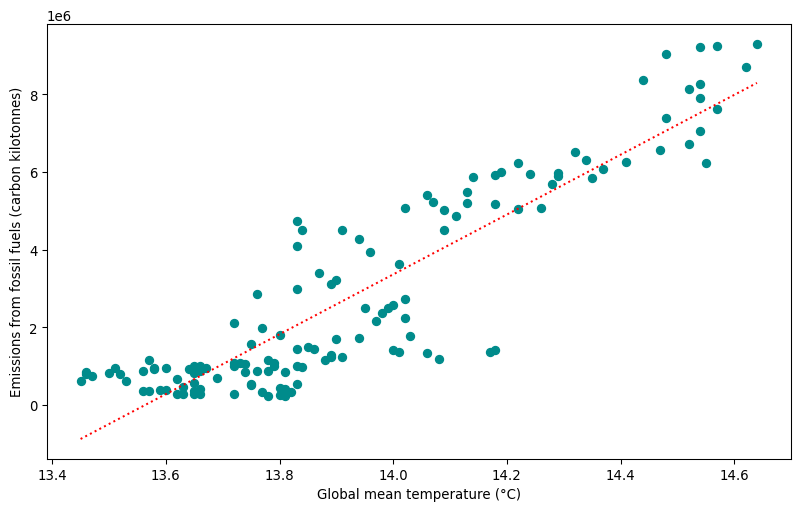

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6), dpi=96)

xs, ys = temps, emissions
plt.scatter(xs, ys, color='darkcyan')

a = covar / tvar
b = fmean - a * tmean

xmin, xmax = min(xs), max(xs)
plt.xlabel('Global mean temperature (°C)')
plt.ylabel('Emissions from fossil fuels (carbon kilotonnes)')
plt.plot([xmin,xmax], [a*xmin + b, a*xmax + b], color='red', ls=":")

pass

The graph above is a scatter plot. On the x axis we have the mean temperatures and on the y axis the mean of the emissions.
We can clearly see a positive correlation between the two variables, the points with the highest level of emissions have a higher mean temperature. We can notice that a lot of data points are grouped at the bottom (under 2 on the y axis), this is because the emission stayed at a relatively low level until the 1940s (as we can se from the global emissions plot).<br />
<br />The dotted line is a linear regression function, and provides a simplified view of our data. It aims to find a linear function where the mean distance (error) between the line and the data points is as low as possible. The function is expressed as follow: <br/> <br/>
 <center>$f(\hat{x}) = a\hat{x} + b$</center><br />where a is the **covariance** between x and y<br/><br/><center>$a = \frac{\sigma_{xy}}{\sigma^2_{x}}$</center><br/> and <br/><center> $b = \bar{y} -a\bar{x}$</center><br/><br/> In this model there is a relation between the slope of the regression function and the correlation between the two variables. A positive value of _a_ will result in a slope increasing from left to right and will represent a positive correlation. On the contrary a negative _a_ value will result in a slop decreasing from left to right and a negative correlation. The value of _a_ will also effect the stepness of our regression function.
It is important to remember that the linear relationship expressed by the equation in an approximation. "It is assumed that there is approximately a linear relationship between X and Y" and also "Once we have used our training data to produce estimates of _a_ and _b_ for the models coefficients, we can predict future values of Y on the basis of a particular value of X" ("An Introduction To Statistical Learning", James, Witten, Hastie & Tibshirani)